In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
import tensorflow as tf

In [6]:
def load_images(folder_path):
    images = []
    labels = []

    for subfolder in os.listdir(folder_path):
        subfolder_path = os.path.join(folder_path, subfolder)
        if not os.path.isdir(subfolder_path):
            continue

        label = subfolder

        for filename in os.listdir(subfolder_path):
            file_path = os.path.join(subfolder_path, filename)
            img = cv2.imread(file_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            img = cv2.resize(img, (im_size, im_size))
            img = np.expand_dims(img, axis=-1) # adding back color channel
            images.append(img)
            labels.append(label)

    images = np.array(images)
    labels = np.array(labels)

    return images, labels

In [4]:
folder = "./chest_xray/train/"
im_size = 200

In [5]:
images, labels = load_images(folder)

In [34]:
labels

array(['NORMAL', 'NORMAL', 'NORMAL', ..., 'PNEUMONIA', 'PNEUMONIA',
       'PNEUMONIA'], dtype='<U9')

In [7]:
images.shape, labels.shape

((5216, 200, 200, 1), (5216,))

In [8]:
normal_images = images[labels == 'NORMAL']
pneumonia_images = images[labels == 'PNEUMONIA']

In [9]:
n_samples = min(normal_images.shape[0], pneumonia_images.shape[0])

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_gen_normal = ImageDataGenerator(
    rotation_range=10, 
    width_shift_range=0.1, 
    height_shift_range=0.1, 
    shear_range=0.1, 
    zoom_range=0.1,
    fill_mode='nearest'
    )

data_gen_pneumonia = ImageDataGenerator(
    rotation_range=10, 
    width_shift_range=0.1, 
    height_shift_range=0.1, 
    shear_range=0.1, 
    zoom_range=0.1,
    fill_mode='nearest'
    )

In [11]:
augmented_normal_images = data_gen_normal.flow(normal_images, batch_size=n_samples, shuffle=True)
augmented_pneumonia_images = data_gen_pneumonia.flow(pneumonia_images, batch_size=n_samples, shuffle=True)

In [12]:
balanced_images = np.concatenate((augmented_normal_images[0][0], augmented_pneumonia_images[0][0]))
balanced_labels = np.concatenate((np.zeros(n_samples), np.ones(n_samples)))

In [13]:
unique, counts = np.unique(balanced_labels, return_counts=True)
print(np.array((unique, counts), dtype=np.int64).T)

[[   0 1341]
 [   1 1341]]


In [5]:
unique, counts = np.unique(labels, return_counts=True)
print(np.asarray((unique, counts)).T)

[['NORMAL' '1341']
 ['PNEUMONIA' '3875']]


In [49]:
def show_images(images, 
                labels, 
                nb_samples = 12, nb_row = 4):
    
    plt.figure(figsize=(12, 12))
    for i in range(nb_samples):
        plt.subplot(nb_row, nb_row, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(labels[i])
    plt.show()

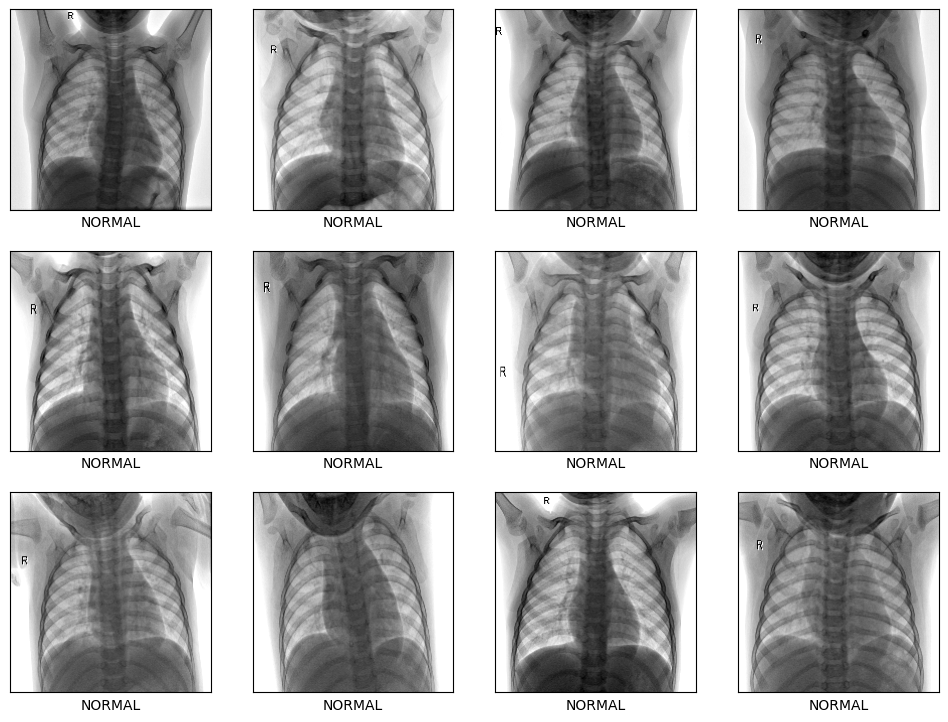

In [50]:
show_images(images, labels)